# <center> EE4708: Final Project <center>

### <center>Team: HastlikhitAksharAnusandhan <center>


### EE17B154: D Tony Fredrick<br>
### EE17B156: Dhruvjyoti Bagadthey

### Download the Dataset

As a substitute to this download command, one can also upload the zip file "iitmee4708.zip" in the same folder where this notebook is saved and get the code to work.

In [ ]:
!gdown "https://drive.google.com/uc?id=1r7j54PKpaOQmOWS6AF3LDzGFCqxh-yRs"

Downloading...
From: https://drive.google.com/uc?id=1r7j54PKpaOQmOWS6AF3LDzGFCqxh-yRs
To: /content/iitmee4708.zip
9.28MB [00:00, 25.4MB/s]


### Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import os
import shutil
from tqdm import tqdm
import pickle
from sklearn.metrics import accuracy_score, f1_score
import skimage as sk
import skimage.transform

# To delete any already existing data folders
try:
    shutil.rmtree("iitmee4708")
except:
    pass

In [ ]:
# Image height and Image width constants
H = 28
W = 28

### Unzip Files, Prepare the Data Folders

In [ ]:
! mkdir iitmee4708
! unzip iitmee4708.zip -d iitmee4708

Streaming output truncated to the last 5000 lines.
  inflating: iitmee4708/Training Dataset/character_5/10.csv  
  inflating: iitmee4708/Training Dataset/character_5/100.csv  
  inflating: iitmee4708/Training Dataset/character_5/1000.csv  
  inflating: iitmee4708/Training Dataset/character_5/101.csv  
  inflating: iitmee4708/Training Dataset/character_5/102.csv  
  inflating: iitmee4708/Training Dataset/character_5/103.csv  
  inflating: iitmee4708/Training Dataset/character_5/104.csv  
  inflating: iitmee4708/Training Dataset/character_5/105.csv  
  inflating: iitmee4708/Training Dataset/character_5/106.csv  
  inflating: iitmee4708/Training Dataset/character_5/107.csv  
  inflating: iitmee4708/Training Dataset/character_5/108.csv  
  inflating: iitmee4708/Training Dataset/character_5/109.csv  
  inflating: iitmee4708/Training Dataset/character_5/11.csv  
  inflating: iitmee4708/Training Dataset/character_5/110.csv  
  inflating: iitmee4708/Training Dataset/character_5/111.csv  
  inf

### Fill Missing Pixel Values

This function considers the 8 neighbours of a pixel having missing values and fills it using either the mean, median or minimum of the pixel values of the neighbours based on the selected option.

In [ ]:
def fillNaNPixels(img, option="mean"):
    """
    Fills the NaN valued pixels with either the mean, median or minimum of the neighbouring pixels.
    """
    # Height and width of the image
    h, w = img.shape
    temp = img.copy()
    # Indices with NaN values
    nan_indices = np.where(np.isnan(temp)==True)
    temp[nan_indices] = 255 # set the empty pixels as 255
    x, y = nan_indices
    for i in range(len(x)):
        # Store pixel instensity values of all available neighbouring pixels
        neighbours = []
        if x[i]>0 and y[i]>0:
            neighbours.append(temp[x[i]-1, y[i]-1])
        if x[i]>0:
            neighbours.append(temp[x[i]-1, y[i]])
        if x[i]>0 and y[i]<w-1:
            neighbours.append(temp[x[i]-1, y[i]+1])
        if y[i]>0:
            neighbours.append(temp[x[i], y[i]-1])
        if y[i]<w-1:
            neighbours.append(temp[x[i], y[i]+1])
        if x[i]<h-1 and y[i]>0:
            neighbours.append(temp[x[i]+1, y[i]-1])
        if x[i]<h-1:
            neighbours.append(temp[x[i]+1, y[i]])
        if x[i]<h-1 and y[i]<w-1:
            neighbours.append(temp[x[i]+1, y[i]+1])

        # Calculates the value to fill based on the selected option
        if option=="mean":
            img[x[i], y[i]] = sum(neighbours)/len(neighbours)
        if option=="minimum":
            img[x[i], y[i]] = min(neighbours)
        if option=='median':
            img[x[i],y[i]] = np.median(neighbours)
    return img

In this cell, we have compared the performance of the different imputation methods for the missing pixel values. The median filter has the best performance. In fact our implementation is similar to a median filter which is proven to work better for removing impulse noise.

Comparison of different Imputation Methods


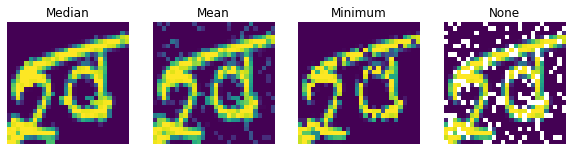

In [ ]:
print("Comparison of different Imputation Methods")
dfa = pd.read_csv("iitmee4708/Training Dataset/"+"character_8"+"/"+'13.csv', header=None)
fig, (ax1, ax2 , ax3, ax4) = plt.subplots(1, 4, figsize=(10,10))
ax1.imshow(fillNaNPixels(np.array(dfa).copy(), "median"))
ax1.set_title('Median')
ax1.axis("off")
ax2.imshow(fillNaNPixels(np.array(dfa).copy(), "mean"))
ax2.set_title('Mean')
ax2.axis("off")
ax3.imshow(fillNaNPixels(np.array(dfa).copy(), "minimum"))
ax3.set_title('Minimum')
ax3.axis("off")
ax4.imshow(dfa)
ax4.set_title('None')
ax4.axis("off")
plt.show()

Fill the missing pixel values and store the modified images in a new directory.

In [ ]:
# Total number of files/images
total_images = 0

# List of folder names for each class
classes = os.listdir("iitmee4708/Training Dataset")

# Delete the filledTraining Dataset directory if it already exists
try:
    shutil.rmtree("iitmee4708/filledTraining Dataset")
except:
    pass

# Create a new directory to store images with NaN pixels filled
os.mkdir("iitmee4708/filledTraining Dataset")

for each_class in tqdm(classes):
    # List of files in each class
    files = os.listdir("iitmee4708/Training Dataset/"+each_class)
    total_images = total_images + len(files)
    # Create a sub-directory for each class in the filledTraining Dataset directory
    os.mkdir("iitmee4708/filledTraining Dataset/"+each_class)
    for file_name in files:
        # Read the original image file with NaN values
        df = pd.read_csv("iitmee4708/Training Dataset/"+each_class+"/"+file_name, header=None)
        # Replace NaN values with minimum of neighbours
        filled_img = fillNaNPixels(np.array(df).copy(), "median")
        # Save the modified image
        df_save = pd.DataFrame(filled_img)
        df_save.to_csv("iitmee4708/filledTraining Dataset/"+each_class+"/"+file_name, index=False)

100%|██████████| 10/10 [02:22<00:00, 14.23s/it]


Create one large dataframe of shape (Total number of images x Number of features). In our case, this is 10,000 x 784.

In [ ]:
X_combined = np.zeros((total_images, H*W))
y_combined = [None]*total_images

### Visualization

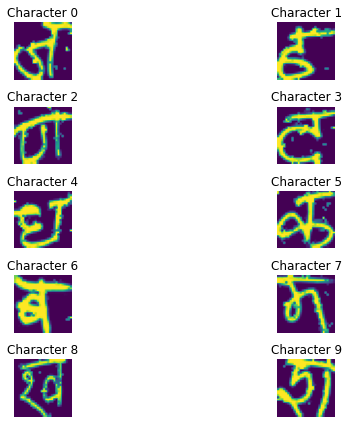

In [ ]:
indices = [list(y_combined).index("character_"+str(i)) for i in range(10)]
plt.figure(figsize=(10,6))
for i in range(10):
    plt.subplot(5, 2, i+1)
    plt.imshow(X_combined[indices[i]].reshape((28, 28)))
    plt.axis("off")
    plt.title("Character "+str(i))
plt.tight_layout()

In [ ]:
# Index variable
i = 0

# Convert each image into a row vector and add it to X_combined
for each_class in tqdm(classes):
    # List of files in each class
    files = os.listdir("iitmee4708/filledTraining Dataset/"+each_class)
    for file_name in files:
        df = pd.read_csv("iitmee4708/filledTraining Dataset/"+each_class+"/"+file_name)
        # Convert the image into a row vector
        X_combined[i, :] = np.array(df).reshape(1, -1)
        y_combined[i] = each_class
        i+=1

y_combined = np.array(y_combined)

100%|██████████| 10/10 [00:29<00:00,  3.00s/it]


In [ ]:
# Convert X_combined into a dataframe
df_combined = pd.DataFrame(X_combined)
print("Shape of df_combined = {}".format(df_combined.shape))

# Add the labels column at the end
df_combined['label'] = y_combined
print("Shape of df_combined with label = {}".format(df_combined.shape))

# Save the dataframe
df_combined.to_csv("iitmee4708/filledTraining Dataset/full_training_data_with_labels.csv", index=False)

Shape of df_combined = (10000, 784)
Shape of df_combined with label = (10000, 785)


### Splitting the data into Training and Validation Datasets

In [ ]:
# Split the data into training and validation datasets with 10%
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_combined, y_combined, test_size=0.1, random_state=2)

print("Shape of X_train = {}".format(X_train.shape))
print("Shape of y_train = {}".format(y_train.shape))
print()
print("Shape of X_val = {}".format(X_val.shape))
print("Shape of y_val = {}".format(y_val.shape))

Shape of X_train = (9000, 784)
Shape of y_train = (9000,)

Shape of X_val = (1000, 784)
Shape of y_val = (1000,)


### Data Augmentation

In this cell, we have provided code for data augmentation. If we set the argument "no_aug_per_img" to 1, then no augmentation takes place.

In [ ]:
#set to 1 for turning off

no_aug_per_img=1
#if no_aug_per_img>1:
X_train_aug=np.zeros((X_train.shape[0]*no_aug_per_img,X_train.shape[1]))
y_train_aug=['None']*(y_train.shape[0]*no_aug_per_img)
i=0 # Starting index
for i in range(len(X_train)):
  X_train_aug[i]=X_train[i]
  y_train_aug[i]=y_train[i]
  for j in range(1,no_aug_per_img):
    # Each image is rotated by a random amount between -5 and +5 degrees.
    X_train_aug[i+j]=np.array(sk.transform.rotate(X_train[i].reshape(28,28),np.random.uniform(-5,5))).reshape(1,-1)
    y_train_aug[i+j]=y_train[i]
  i+=no_aug_per_img

print(X_train_aug.shape)

X_train=X_train_aug
y_train=y_train_aug

(9000, 784)


### Classification Methods

### Logistic Regression

The first method that we tried was **Logistic Regression**.

In [ ]:
# Import necessary functions from sklearn library
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Logistic Regression
clf = make_pipeline(PolynomialFeatures(9),LogisticRegression())
clf.fit(X_train, y_train)

# Accuracy on the training and validation set
train_acc = clf.score(X_train, y_train)
test_acc = clf.score(X_val, y_val)

# Training set predictions
y_train_pred = clf.predict(X_train)
# Training set F1 score
train_f1 = f1_score(y_train, y_train_pred, average='weighted')

# Validation set predictions
y_val_pred = clf.predict(X_val)
# Validation set F1 scpre
val_f1 = f1_score(y_val, y_val_pred, average='weighted')

print("Training Accuracy = {} %".format(train_acc*100))
print("Validation Accuracy = {} %".format(test_acc*100))
print()
print("Training F1 Score = {}".format(train_f1))
print("Validation F1 Score = {}".format(val_f1))

KeyboardInterrupt: ignored

Using only Logistic Regression resulted in **very high overfitting**. The training accuracy is very high, but the validation set accuracy is almost 20% lower, indicating very large overfitting. 

In the next step, we try to mitigate this problem by using **dimensionality reduction techniques**.

### Logistic Regression + PCA

Since the number of features is large (**784** features) for each image, we have used Principal Components Analysis for dimensionality reduction and selected 100 features.

In [ ]:
# Import necessary functions from sklearn library
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# PCA model
pca = PCA(n_components=250)
X_train_transformed = pca.fit_transform(X_train)
X_val_transformed = pca.transform(X_val)

# Logistic Regression
clf = LogisticRegression()
clf.fit(X_train_transformed, y_train)

# Accuracy on the training and validation set
train_acc = clf.score(X_train_transformed, y_train)
test_acc = clf.score(X_val_transformed, y_val)

# Training set predictions
y_train_pred = clf.predict(X_train_transformed)
# Training set F1 score
train_f1 = f1_score(y_train, y_train_pred, average='weighted')

# Validation set predictions
y_val_pred = clf.predict(X_val_transformed)
# Validation set F1 scpre
val_f1 = f1_score(y_val, y_val_pred, average='weighted')

print("Training Accuracy = {} %".format(train_acc*100))
print("Validation Accuracy = {} %".format(test_acc*100))
print()
print("Training F1 Score = {}".format(train_f1))
print("Validation F1 Score = {}".format(val_f1))

Training Accuracy = 89.32222222222222 %
Validation Accuracy = 80.5 %

Training F1 Score = 0.89245333475858
Validation F1 Score = 0.8040748321132353


The training set accuracy and the validation set accuracy are comparable **(~83% to ~85%)**. Therefore the problem of overfitting has been overcome by using **dimensionality reduction** with **Principal Components Analysis (PCA)**.

In order to further improve the accuracy of the model, we have tried more sophisticated methods below. PCA will be used in all these steps for dimensionality reduction to avoid overfitting.

### Gaussian Naive Bayes + PCA

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA

# PCA model
pca = PCA(n_components=100)
X_train_transformed = pca.fit_transform(X_train)
X_val_transformed = pca.transform(X_val)

# Gaussian Naive Bayes Classifier
random_forest = GaussianNB()
random_forest.fit(X_train_transformed, y_train)

# Accuracy on the training and validation set
train_acc = random_forest.score(X_train_transformed, y_train)
test_acc = random_forest.score(X_val_transformed, y_val)

# Prediction on the traininig set
y_train_pred = random_forest.predict(X_train_transformed)
# Training F1 score
train_f1 = f1_score(y_train, y_train_pred, average='weighted')

# Prediction on the validation set
y_val_pred = random_forest.predict(X_val_transformed)
# Validation F1 score
val_f1 = f1_score(y_val, y_val_pred, average='weighted')

print("Training Accuracy = {} %".format(train_acc*100))
print("Validation Accuracy = {} %".format(test_acc*100))
print()
print("Training F1 Score = {}".format(train_f1))
print("Validation F1 Score = {}".format(val_f1))

Training Accuracy = 81.42222222222222 %
Validation Accuracy = 79.3 %

Training F1 Score = 0.815458937019456
Validation F1 Score = 0.794110340304517


### K Nearest Neighbours Classifier + PCA

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=100)
X_train_transformed = pca.fit_transform(X_train)
X_val_transformed = pca.transform(X_val)

scaler = StandardScaler()
X_train_sc=scaler.fit_transform(X_train_transformed)
X_val_sc=scaler.transform(X_val_transformed)


neigh = KNeighborsClassifier(n_neighbors=31)
neigh.fit(X_train_transformed, y_train)

# Accuracy on the training and validation set
train_acc = neigh.score(X_train_transformed, y_train)
test_acc = neigh.score(X_val_transformed, y_val)

# Prediction on the traininig set
y_train_pred = neigh.predict(X_train_transformed)
# Training F1 score
train_f1 = f1_score(y_train, y_train_pred, average='weighted')

# Prediction on the validation set
y_val_pred = neigh.predict(X_val_transformed)
# Validation F1 score
val_f1 = f1_score(y_val, y_val_pred, average='weighted')

print("Training Accuracy = {} %".format(train_acc*100))
print("Validation Accuracy = {} %".format(test_acc*100))
print()
print("Training F1 Score = {}".format(train_f1))
print("Validation F1 Score = {}".format(val_f1))

Training Accuracy = 93.31111111111112 %
Validation Accuracy = 92.9 %

Training F1 Score = 0.9329978551231658
Validation F1 Score = 0.9286163237211345


### Support Vector Machines (SVM Classifier)

I am using GridSearchCV to find the best value of C. Higher C implies lower regularization and vice-versa. Using cross-validation we can find out the best value of this parameter.

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Higher the value of C, lower is the regularization
paramter_dict = {"C": [0.01, 0.03, 0.1, 0.3, 1, 3, 10]}
svm_model = SVC()
grid_search_svm = GridSearchCV(svm_model, param_grid=paramter_dict, cv=5)
grid_search_svm.fit(X_train, y_train)

print(grid_search_svm.best_params_)

{'C': 10}


The best value returned is 10, using this in the **SVM Classifier**, we get:

In [ ]:
from sklearn.svm import SVC

# On using C = best paramter value returned by gridsearch CV
best_C = 10
clf = SVC(C=best_C)
clf.fit(X_train, y_train)

# Accuracy on the training and validation set
train_acc = clf.score(X_train, y_train)
test_acc = clf.score(X_val, y_val)

# Training set predictions
y_train_pred = clf.predict(X_train)
# Training set F1 score
train_f1 = f1_score(y_train, y_train_pred, average='weighted')

# Validation set predictions
y_val_pred = clf.predict(X_val)
# Validation set F1 score
val_f1 = f1_score(y_val, y_val_pred, average='weighted')

print("Training Accuracy = {} %".format(train_acc*100))
print("Validation Accuracy = {} %".format(test_acc*100))
print()
print("Training F1 Score = {}".format(train_f1))
print("Validation F1 Score = {}".format(val_f1))

Training Accuracy = 100.0 %
Validation Accuracy = 96.6 %

Training F1 Score = 1.0
Validation F1 Score = 0.9659672139409856


### SVM + PCA

As seen before, PCA helps in reducing overfitting. On using PCA to select 100 features and then SVM for classification:

In [ ]:
|from sklearn.decomposition import PCA
from sklearn.svm import SVC

pca = PCA(n_components=100)
X_train_transformed = pca.fit_transform(X_train)
X_val_transformed = pca.transform(X_val)

clf = SVC(C=3)
clf.fit(X_train_transformed, y_train)

# Accuracy on the training and validation set
train_acc = clf.score(X_train_transformed, y_train)
test_acc = clf.score(X_val_transformed, y_val)
y_train_pred = clf.predict(X_train_transformed)
train_f1 = f1_score(y_train, y_train_pred, average='weighted')
y_val_pred = clf.predict(X_val_transformed)
val_f1 = f1_score(y_val, y_val_pred, average='weighted')
print("Training Accuracy = {} %".format(train_acc*100))
print("Validation Accuracy = {} %".format(test_acc*100))
print()
print("Training F1 Score = {}".format(train_f1))
print("Validation F1 Score = {}".format(val_f1))

Training Accuracy = 99.8111111111111 %
Validation Accuracy = 97.1 %

Training F1 Score = 0.9981109758736546
Validation F1 Score = 0.9709924841831596


There is an improvement in the performance of the classifier on the unseen validation set, due to the use of PCA, which helped in reducing overfitting. The overall performance is also much better than Logistic Regression, as SVM is capable of learning more complex decision boundaries.


In the next cell, we have used the **Pipeline** feature of sklearn to create a "pipeline" of the PCA model followed by the SVM Classifier. This is done so that we can select the best combination of the parameters**(number of components for PCA and C value for SVM)** using grid search cross-validation.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define a pipeline to search for the best combination of PCA dimensionality reduction
# and SVM classifier regularization.
pca = PCA()
svm= SVC(break_ties=True)
pipe = Pipeline(steps=[('pca', pca), ('svm', svm)])

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'pca__n_components': [50, 100, 150, 200, 250, 300],
    'svm__C': [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100],
}
search = GridSearchCV(pipe, param_grid, n_jobs=-1)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.968):
{'pca__n_components': 100, 'svm__C': 100}


In [ ]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization.
pca = PCA(n_components=100)
svm= SVC(C=10,kernel='sigmoid')
pipe = Pipeline(steps=[('pca', pca), ('svm', svm)])

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'svm__coef0': [-100,-50,-10,-2,0,2,10,50,100]
}
search = GridSearchCV(pipe, param_grid, n_jobs=-1)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.962):
{'svm__coef0': -2}


In [ ]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC


pca = PCA(n_components=50)
X_train_transformed = pca.fit_transform(X_train)
X_val_transformed = pca.transform(X_val)

# Normalization
scaler = StandardScaler()
X_train_sc=scaler.fit_transform(X_train_transformed)
X_val_sc=scaler.transform(X_val_transformed)

clf = SVC(C=10)
clf.fit(X_train_transformed, y_train)

# Accuracy on the training and validation set
train_acc = clf.score(X_train_transformed, y_train)
test_acc = clf.score(X_val_transformed, y_val)
y_train_pred = clf.predict(X_train_transformed)
train_f1 = f1_score(y_train, y_train_pred, average='weighted')
y_val_pred = clf.predict(X_val_transformed)
val_f1 = f1_score(y_val, y_val_pred, average='weighted')
print("Training Accuracy = {} %".format(train_acc*100))
print("Validation Accuracy = {} %".format(test_acc*100))
print()
print("Training F1 Score = {}".format(train_f1))
print("Validation F1 Score = {}".format(val_f1))

Training Accuracy = 99.94444444444444 %
Validation Accuracy = 97.7 %

Training F1 Score = 0.9994444411061467
Validation F1 Score = 0.9769860566733256


For the above choice of parameters, i.e. 50 features selected by PCA, C parameter value = 10, along with the use of scaling, we get the best performance so far.

### Random Forest Classifier with PCA



In this cell, we created a pipeline of the PCA model and the Random Forest Classifier to train both together and then find the best value of the parameters **(number of components for PCA and maximum depth for RandomForest Classifier)**.

In [ ]:
# Define a pipeline to search for the best combination of PCA dimensionality reduction
# and Random Forest classifier max depth
pca = PCA()
rf= RandomForestClassifier()
pipe = Pipeline(steps=[('pca', pca), ('rf', rf)])

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'pca__n_components': [20, 50, 100, 150, 200, 250, 300],
    'rf__max_depth': [10,15,20,25,50,60,100]
}
search = GridSearchCV(pipe, param_grid, n_jobs=-1)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.895):
{'pca__n_components': 50, 'rf__max_depth': 50}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

X_train_transformed = X_train
X_val_transformed = X_val

pca = PCA(n_components=50)
X_train_transformed = pca.fit_transform(X_train)
X_val_transformed = pca.transform(X_val)

random_forest = RandomForestClassifier(max_depth=50)
random_forest.fit(X_train_transformed, y_train)

# Accuracy on the training and validation set
train_acc = random_forest.score(X_train_transformed, y_train)
test_acc = random_forest.score(X_val_transformed, y_val)

# Training set prediction
y_train_pred = random_forest.predict(X_train_transformed)
# Training F1 score
train_f1 = f1_score(y_train, y_train_pred, average='weighted')

# Validation set prediction
y_val_pred = random_forest.predict(X_val_transformed)
# Validation F1 sscore
val_f1 = f1_score(y_val, y_val_pred, average='weighted')
print("Training Accuracy = {} %".format(train_acc*100))
print("Validation Accuracy = {} %".format(test_acc*100))
print()
print("Training F1 Score = {}".format(train_f1))
print("Validation F1 Score = {}".format(val_f1))

Training Accuracy = 100.0 %
Validation Accuracy = 90.9 %

Training F1 Score = 1.0
Validation F1 Score = 0.9084823008155766


### Ensemble Methods

Using Bagging to create an ensemble of SVMs for classification

In [ ]:
from sklearn.ensemble import BaggingClassifier

# PCA model
pca = PCA(n_components=50)
X_train_transformed = pca.fit_transform(X_train)
X_val_transformed = pca.transform(X_val)

# Ensemble of 10 SVMs
clf = BaggingClassifier(base_estimator=SVC(),n_estimators=10).fit(X_train_transformed, y_train)

# Accuracy on the training and validation set
train_acc = clf.score(X_train_transformed, y_train)
test_acc = clf.score(X_val_transformed, y_val)

# Prediction on the training set
y_train_pred = clf.predict(X_train_transformed)
# Training set F1 score
train_f1 = f1_score(y_train, y_train_pred, average='weighted')

# Prediction on the validation set
y_val_pred = clf.predict(X_val_transformed)
# Validation set F1 score
val_f1 = f1_score(y_val, y_val_pred, average='weighted')

print("Training Accuracy = {} %".format(train_acc*100))
print("Validation Accuracy = {} %".format(test_acc*100))
print()
print("Training F1 Score = {}".format(train_f1))
print("Validation F1 Score = {}".format(val_f1))

Training Accuracy = 98.52222222222223 %
Validation Accuracy = 96.0 %

Training F1 Score = 0.9852143012188007
Validation F1 Score = 0.9598811212829836


### Voting Classifier

A Voting Classifier is a machine learning model that trains on an ensemble of numerous models and predicts an output (class) based on their highest probability of chosen class as the output.

It simply aggregates the findings of each classifier passed into Voting Classifier and predicts the output class based on the highest majority of voting. In hard voting, the predicted output class is a class with the highest majority of votes i.e the class which had the highest probability of being predicted by each of the classifiers. 

Suppose three classifiers predicted the output class(A, A, B), so here the majority predicted A as output. Hence A will be the final prediction.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

X_train_transformed = X_train
X_val_transformed = X_val

# The final model will take a vote based on the results of all these estimators
estimators = [('Knn1', make_pipeline(PCA(n_components=50),KNeighborsClassifier(n_neighbors=5))),
              ('Knn2', make_pipeline(PCA(n_components=50),KNeighborsClassifier(n_neighbors=9))),
              ('rf1', make_pipeline(PCA(n_components=50),RandomForestClassifier(random_state=2))),
              ('rf2', make_pipeline(PCA(n_components=50),RandomForestClassifier(max_depth=50,random_state=2))),
              ('svr1', make_pipeline(PCA(n_components=50),SVC(C=10,random_state=2))),
              ('svr2', make_pipeline(PCA(n_components=50),StandardScaler(),SVC(C=10,random_state=2))),
              ('svr3', make_pipeline(PCA(n_components=100),StandardScaler(),SVC(C=10,random_state=2)))]

clf = VotingClassifier(estimators=estimators,voting='hard')
clf.fit(X_train_transformed, y_train)

# Accuracy on the training and validation set
train_acc = clf.score(X_train_transformed, y_train)
test_acc = clf.score(X_val_transformed, y_val)

# Prediction on the training set
y_train_pred = clf.predict(X_train_transformed)
# Training set F1 score
train_f1 = f1_score(y_train, y_train_pred, average='weighted')

# Prediction on the validation set
y_val_pred = clf.predict(X_val_transformed)
# Validation set F1 score
val_f1 = f1_score(y_val, y_val_pred, average='weighted')

print("Training Accuracy = {} %".format(train_acc*100))
print("Validation Accuracy = {} %".format(test_acc*100))
print()
print("Training F1 Score = {}".format(train_f1))
print("Validation F1 Score = {}".format(val_f1))

Training Accuracy = 100.0 %
Validation Accuracy = 96.7 %

Training F1 Score = 1.0
Validation F1 Score = 0.9670471894008762


### Stacking Classifier

Stacking is an ensemble learning technique to combine multiple classification models via a meta-classifier.  The individual classification models are trained based on the complete training set. Then, the meta-classifier is fitted based on the outputs, the meta-features of the individual classification models in the ensemble. The meta-classifier can either be trained on the predicted class labels or probabilities from the ensemble.

Here by default we are training it on the predicted class labels. Since the meta-features are class labels, Random Forest works best as our meta-estimator.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X_train_transformed = X_train
X_val_transformed = X_val

# The Stacking classifier is built using these models (dimensionality reduction PCA + classifier)
estimators = [('Knn1', make_pipeline(PCA(n_components=60),KNeighborsClassifier(n_neighbors=5))),
              ('Knn2', make_pipeline(PCA(n_components=60),KNeighborsClassifier(n_neighbors=9))),
              ('rf1', make_pipeline(PCA(n_components=60),RandomForestClassifier(random_state=2))),
              ('rf2', make_pipeline(PCA(n_components=60),RandomForestClassifier(max_depth=50,random_state=2))),
              ('svr1', make_pipeline(PCA(n_components=60),SVC(C=10,random_state=2))),
              ('svr2', make_pipeline(PCA(n_components=60),StandardScaler(),SVC(C=10,random_state=2)))]


clf = StackingClassifier(estimators=estimators, final_estimator=RandomForestClassifier(random_state=2))

clf.fit(X_train_transformed, y_train)

# Accuracy on the training and validation set
train_acc = clf.score(X_train_transformed, y_train)
test_acc = clf.score(X_val_transformed, y_val)

# Prediction on the training set
y_train_pred = clf.predict(X_train_transformed)
# Training F1 score
train_f1 = f1_score(y_train, y_train_pred, average='weighted')

# Prediction on the validation set
y_val_pred = clf.predict(X_val_transformed)
# Validation F1 score
val_f1 = f1_score(y_val, y_val_pred, average='weighted')


print("Training Accuracy = {} %".format(train_acc*100))
print("Validation Accuracy = {} %".format(test_acc*100))
print()
print("Training F1 Score = {}".format(train_f1))
print("Validation F1 Score = {}".format(val_f1))

Training Accuracy = 99.93333333333332 %
Validation Accuracy = 97.89999999999999 %

Training F1 Score = 0.999333393920687
Validation F1 Score = 0.9789790976922577


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X_train_transformed = X_train
X_val_transformed = X_val

# The Stacking classifier is built using these models (dimensionality reduction PCA + classifier)
estimators = [('Knn1', make_pipeline(PCA(n_components=60),KNeighborsClassifier(n_neighbors=5))),
              ('Knn2', make_pipeline(PCA(n_components=60),KNeighborsClassifier(n_neighbors=9))),
              ('rf1', make_pipeline(PCA(n_components=60),RandomForestClassifier(random_state=2))),
              ('rf2', make_pipeline(PCA(n_components=60),RandomForestClassifier(max_depth=50,random_state=2))),
              ('svr1', make_pipeline(PCA(n_components=60),SVC(C=10,random_state=2))),
              ('svr2', make_pipeline(PCA(n_components=60),StandardScaler(),SVC(C=10,random_state=2)))]


clf = StackingClassifier(estimators=estimators, final_estimator=RandomForestClassifier(random_state=2))

clf.fit(X_train_transformed, y_train)

# Accuracy on the training and validation set
train_acc = clf.score(X_train_transformed, y_train)
test_acc = clf.score(X_val_transformed, y_val)

# Prediction on the training set
y_train_pred = clf.predict(X_train_transformed)
# Training F1 score
train_f1 = f1_score(y_train, y_train_pred, average='weighted')

# Prediction on the validation set
y_val_pred = clf.predict(X_val_transformed)
# Validation F1 score
val_f1 = f1_score(y_val, y_val_pred, average='weighted')


print("Training Accuracy = {} %".format(train_acc*100))
print("Validation Accuracy = {} %".format(test_acc*100))
print()
print("Training F1 Score = {}".format(train_f1))
print("Validation F1 Score = {}".format(val_f1))

Training Accuracy = 99.95555555555555 %
Validation Accuracy = 98.0 %

Training F1 Score = 0.9995555549316539
Validation F1 Score = 0.9800080486285928


#### Confusion Matrix

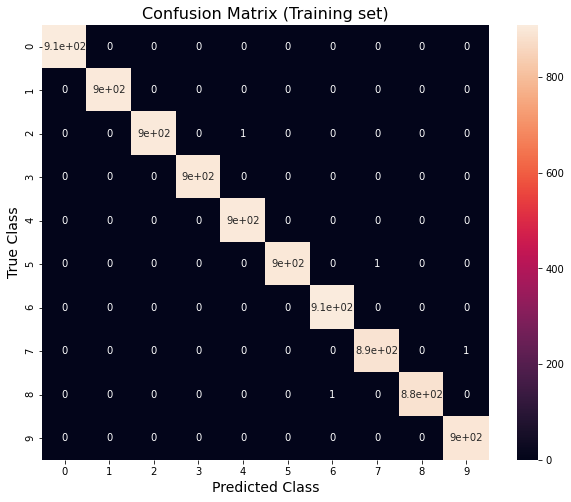

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cnf_matrix_train = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(10, 8))
ax = sns.heatmap(cnf_matrix_train, annot=cnf_matrix_train)
ax.set_title("Confusion Matrix (Training set)", size=16)
ax.set_xlabel("Predicted Class", size=14)
ax.set_ylabel("True Class", size=14)
plt.show()

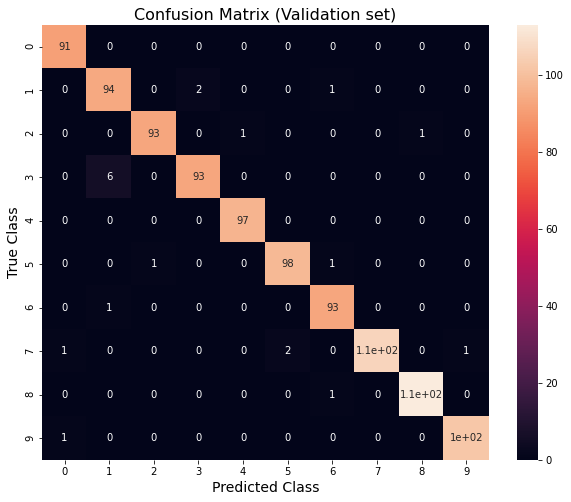

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cnf_matrix_val = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(10, 8))
ax = sns.heatmap(cnf_matrix_val, annot=cnf_matrix_val)
ax.set_title("Confusion Matrix (Validation set)", size=16)
ax.set_xlabel("Predicted Class", size=14)
ax.set_ylabel("True Class", size=14)
plt.show()

We can see 6 mismatches in the cell corresponding to True Class 3, but Predicted Class 1, as the Devanagiri letters in those classes are almost identical except for a short tail at the bottom.

The **Stacking classifier** gave us the best accuracy and F1 score. In the next cell, we train the entire dataset **(training set + validation set)** using this Stacking Classifier.

In [ ]:
# The stacking classifier is fit on the entire dataset (training + validation)
clf.fit(X_combined, y_combined)

StackingClassifier(cv=None,
                   estimators=[('Knn1',
                                Pipeline(memory=None,
                                         steps=[('pca',
                                                 PCA(copy=True,
                                                     iterated_power='auto',
                                                     n_components=60,
                                                     random_state=None,
                                                     svd_solver='auto', tol=0.0,
                                                     whiten=False)),
                                                ('kneighborsclassifier',
                                                 KNeighborsClassifier(algorithm='auto',
                                                                      leaf_size=30,
                                                                      metric='minkowski',
                                                       

### Public Test Set

In [ ]:
# Read the test data set
df_test = pd.read_csv("iitmee4708/public_test.csv", header=None)
print("Shape of df_test = {}".format(df_test.shape))
X_df_test = np.array(df_test)
Mtest = X_df_test.shape[1]

# Each column here is an image. The images are in a rotated and flipped format,
# so we have to convert them back to the correct orientation.
X_test = np.zeros((Mtest, H*W))
for i in range(Mtest):
    X_test[i, :] = np.rot90(np.flip(X_df_test[:, i].reshape(28, 28), axis=1)).reshape(1, H*W)

Shape of df_test = (784, 1000)


### Making a submission

Using the best classifier, we find the predictions on X_test. We have then converted it into the submission CSV format that is needed for Kaggle.

In [ ]:
y_pred = clf.predict(X_test)
df = pd.DataFrame(y_pred)
df.to_csv("submission.csv", index=False)

df_submit = pd.read_csv("submission.csv")
df_submit['Id'] = ["Sample_"+str(i+1) for i in list(range(df_submit.shape[0]))]
df_submit['Expected'] = [each.split("_")[1] for each in y_pred]
df_submit = df_submit[["Id", "Expected"]]
df_submit.head()

# This submission.csv file is what must be submitted
df_submit.to_csv("submission.csv", index=False)
df_submit.head()

NameError: ignored

### Saving the model

In [ ]:
# Name of the pickle file
model_filename = 'finalized_model.sav'

# Saving the model
pickle.dump(clf, open(model_filename, 'wb'))

### Loading a saved model

As our model is large and does not fit within the specified size of 20MB, we have saved it on Google Drive and provided code for downloading and using it here.

In [ ]:
# Load the model by downloading it from Google Drive
!gdown "https://drive.google.com/uc?id=1QFL-4-sxhv-wy3ZHQSyqsVtoI2P091fg"

Downloading...
From: https://drive.google.com/uc?id=1QFL-4-sxhv-wy3ZHQSyqsVtoI2P091fg
To: /content/finalized_model.sav
140MB [00:01, 74.7MB/s]


In [ ]:
import pickle

# Load the model if saved in the same repository
final_model = pickle.load(open('finalized_model.sav','rb'))

In the next cell we are checking whether the downloaded model produces the desired results.

In [ ]:
# Training set accuracy
combined_train_acc = final_model.score(X_combined, y_combined)
print("Training set accuracy (combined) = {} %".format(combined_train_acc * 100))

Training set accuracy (combined) = 99.98 %


## Required Function 

1. This is the function that we were asked to submit. The model that we are using can be downloaded from here: https://drive.google.com/file/d/1QFL-4-sxhv-wy3ZHQSyqsVtoI2P091fg/view

2. In Colab, we can just run the below cell and the model will get downloaded automatically.

3. While calling this function, the first argument should be the name of the private test CSV file. The second argument is the name of the pickle file storing the model.

4. When the function is run, it will return the numpy of array of shape (1000, 1) called **predicted_class** that stores the predicted class for each example. It stores the class as an integer value.

5. The function will also create a file called **"private_submission.csv"** which is in a format ready to be submitted to Kaggle.


In [ ]:
# Load the model by downloading it from Google Drive
!gdown "https://drive.google.com/uc?id=1QFL-4-sxhv-wy3ZHQSyqsVtoI2P091fg"

def predict_private_dataset(private_test_name="private_test.csv", model_name="finalized_model.sav"):
    """
    1. Loads the model specified by "model_name"
    2. Converts the private test file into a numpy matrix
    3. Predicts the labels for the private test file.
    4. Stores the labels in a CSV file using the format used for Kaggle submission: "private_submission.csv"
    5. Returns the labels as a numpy array.
    """
    import numpy as np
    import pandas as pd
    import pickle

    # Load the model if saved in the same repository
    final_model = pickle.load(open(model_name,'rb'))

    # Convert the private_test.csv file into a numpy matrix
    df_test = pd.read_csv(private_test_name, header=None)
    X_df_test = np.array(df_test)
    Mtest = X_df_test.shape[1]

    # Each column here is an image. The images are in a rotated and flipped format,
    # so we have to convert them back to the correct orientation.
    X_test = np.zeros((Mtest, 28*28))
    for i in range(Mtest):
        X_test[i, :] = np.rot90(np.flip(X_df_test[:, i].reshape(28, 28), axis=1)).reshape(1, 28*28)

    # Prediction
    y_test_predictions = final_model.predict(X_test)

    df = pd.DataFrame(y_test_predictions)
    df.to_csv("private_submission.csv", index=False)

    df_submit = pd.read_csv("private_submission.csv")
    df_submit['Id'] = ["Sample_"+str(i+1) for i in list(range(df_submit.shape[0]))]
    df_submit['Expected'] = [each.split("_")[1] for each in y_test_predictions]
    df_submit = df_submit[["Id", "Expected"]]

    df_submit.to_csv("private_submission.csv", index=False)

    # Numpy array predicted_class
    predicted_class = np.zeros((Mtest, 1), dtype="int")
    for i in range(Mtest):
        predicted_class[i][0] = int(y_test_predictions[i].split("_")[1])

    return predicted_class

Downloading...
From: https://drive.google.com/uc?id=1QFL-4-sxhv-wy3ZHQSyqsVtoI2P091fg
To: /content/finalized_model.sav
140MB [00:00, 210MB/s]


In [ ]:
public_test_predictions = predict_private_dataset("public_test(1).csv", "finalized_model.sav")

In [ ]:
df_labels = pd.read_csv("public_test_labels(2).csv", header=None)

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1_score(df_labels, public_test_predictions, average="weighted")

0.9779188281673238

In [ ]:
private_test_predictions = predict_private_dataset("private_test(1).csv", "finalized_model.sav")

In [ ]:
df_labels_private = pd.read_csv("private_test_labels(1).csv", header=None)

In [ ]:
f1_score(df_labels_private, private_test_predictions, average="weighted")

0.9789843745793614